# Practical Machine Learning                                                                             
# Lab 1

## Exercises

### 1.[Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/images.zip), we have 8 images, read the images, flatten them, then store them in a numpy array. Before storing the images divide them by 255.
The numpy array should have the dimension equals to (8, 12288), in order to check the dimension use the $shape$ attribute.

In [3]:
import os  # dealing with operating system-dependent functionalities like reading files
import matplotlib.image as mpimg # used for reading image files
import numpy as np  # library for numerical operations on arrays

folder_name = 'images'
files = os.listdir(folder_name) # list containing the names of all images
images = [] # empty list

for file in files: # for each image in the directory
    # img = imread(os.path.join(folder_name, file), mode='RGB')
    # im = Image.open(os.path.join(folder_name, file))
    # img = np.array(im)
    img = mpimg.imread(os.path.join(folder_name, file)) * 255 # the image is read into a numpy array

    images.append(img.flatten() / 255) # ;np.reshape(img, [-1])  #.flatten() method is used to convert the 2D or 3D image array into a 1D array

images = np.array(images) #the list images is converted into a numpy array for efficient numerical operations

print(images.shape)

(8, 12288)


### 2. Compute the mean of the images. 

In [5]:
mean_image = np.mean(images, axis=0) #will contain the average of all the 8 images at each pixel position, the mean image of all 8 images
print(mean_image)

[0.27254903 0.34509805 0.22745098 ... 0.3769608  0.40735295 0.33676472]


### 3. Normalize the images by subtracting the mean from each image.

In [6]:
normalized_images = images - mean_image #broadcasting
print(normalized_images)
#By subtracting the mean, the resulting "normalized" images will have values centered around zero, which can be beneficial for many algorithms

[[-0.20980394 -0.34509805 -0.22352941 ... -0.09460786 -0.19558825
  -0.16813727]
 [ 0.00196078 -0.04705882 -0.05098039 ...  0.21519607  0.21617648
   0.0357843 ]
 [-0.09607844 -0.09411764  0.11764707 ...  0.10539213  0.07499999
   0.1612745 ]
 ...
 [ 0.04117647  0.12156862 -0.01568627 ... -0.05539218  0.13382354
  -0.05833334]
 [ 0.6607843   0.5529412   0.07843138 ... -0.302451   -0.3289216
  -0.27401963]
 [ 0.06470588  0.03921568 -0.05098039 ...  0.40343136  0.2514706
   0.20833334]]


### 4. [Here](https://github.com//practical-ML-fmi/ML/raw/master/Data/lab1/weights.zip), we have the weights and the bias for a perceptron that classifies the images in 4 classes. Use the weights (use np.load(‘path’) to load the weights) and the images (after normalization) to compute (y_hat) the predictions of the perceptron.  
  $$ y_{hat} = softmax(X * W + b) $$
  $$ X - input, W - weights, b - bias $$
  $$Softmax(z_i)=\frac{e^{z_i}}{\sum_{j=1}^{j=K} e^{z_j} }$$

In [8]:
weights = np.load('coefs.npy')
bias = np.load('bias.npy')

def softmax(Z):
    return np.exp(Z) / np.sum(np.exp(Z))

z_1 = np.dot(normalized_images, weights) + bias
a_1 = softmax(z_1)
y_pred = np.argmax(a_1, axis=1)
print(y_pred)

[0 1 0 2 3 2 1 2]


### 5. Let the ground-truth labels be y = [0, 0, 1, 1, 2,  2, 3,  3]. Compute the accuracy of the classifier (define a new function accuracy_score). 
$$Accuracy = \frac{1}{n} \sum_{i=1}^{j=n} y_{pred}^i == y_{true}^i$$

In [9]:
def accuracy_score(y_true, y_pred):
    return np.mean(y_true == y_pred) # the mean effectively calculates the fraction of correct predictions, here True denotes a correct prediction and False denotes an incorrect one

y_true = [0, 0, 1, 1, 2, 2, 3, 3]
print(y_pred)
print('the accuracy is ', accuracy_score(y_true, y_pred))
# For example, an accuracy of 1.0 means that all predictions were correct, while an accuracy of 0.5 means that half of the predictions were correct
# The accuracy is a measure of this performance, with higher values indicating better performance.
# This code compares those predictions to the actual labels to determine how well the model performed on this dataset

[0 1 0 2 3 2 1 2]
the accuracy is  0.25


### 6. The labels of the classes are: (Cat - 0,  Dog - 1, Frog - 2,  Horse - 3), print the label for each prediction (use a dictionary). 


In [10]:
labels = {0: 'cat', 1: 'dog', 2: 'frog', 3: 'horse'}

for i in range(4):
    print('class %d has the label %s' % (i, labels[i]))

class 0 has the label cat
class 1 has the label dog
class 2 has the label frog
class 3 has the label horse


### 7. Display the mean image (use imshow from Matplotlib).
#### Don’t forget to multiply the image by 255, then convert the image to uint8.

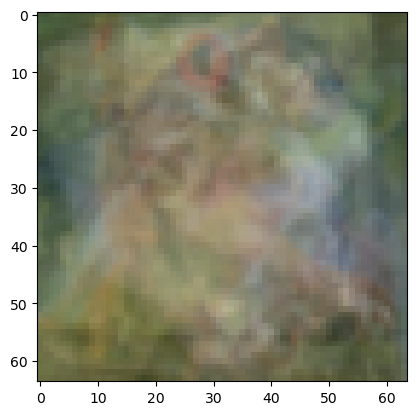

--Call--
> /Users/vasaia/anaconda3/lib/python3.11/site-packages/IPython/core/displayhook.py(258)__call__()
    256         sys.stdout.flush()
    257 
--> 258     def __call__(self, result=None):
    259         """Printing with history cache management.
    260 



In [12]:
import pdb #built-in Python debugger, which allows you to set breakpoints and inspect the state of your program at specific points
import matplotlib.pyplot as plt # plotting library for Python

img = mean_image.reshape((64, 64, 3)) #reshapes it into a 64x64 RGB image, becomes a 3D array
plt.imshow(np.uint8(img * 255))
plt.show()

pdb.set_trace()